## Import Libraries




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

sns.set_style("whitegrid")

## Load Dataset

In [2]:
df = pd.read_csv("cloud_outages_dataset.csv")
df.head()

,incident_id,cloud_provider,region,service,service_subtype,start_time,end_time,duration_minutes,severity,status,...,post_mortem_link,is_recurrent_issue,previous_incident_id,external_factors,scheduled_maintenance_conflict,patch_applied,system_load_before_outage,system_load_after_outage,backup_system_triggered,notes
0,aeb380d2-6559-4d99-abfb-17e1c45e831b,AWS,europe-west2,Storage,S3,2025-06-30 10:18:08.524480,2025-06-30 13:15:08.524480,177,Low,Monitoring,...,NaN,No,NaN,NaN,No,No,40,46,Yes,Simulated note
1,ddf7e3a0-f44d-4c94-ae32-189213321e2d,IBM,asia-southeast1,AI/ML,RDS,2025-06-28 10:18:08.524591,2025-06-28 20:52:08.524591,634,Low,Investigating,...,NaN,No,NaN,Weather,Yes,No,45,55,Yes,Simulated note
2,b17b9c80-94a0-4ca5-b52f-f1e7853b1240,AWS,europe-west2,Storage,S3,2025-06-01 10:18:08.524638,2025-06-01 14:36:08.524638,258,High,Resolved,...,NaN,No,NaN,DDoS,No,Yes,61,74,No,Simulated note
3,c856b404-e22e-4f84-8bed-9b1512adc9b5,AWS,asia-southeast1,Compute,Lambda,2025-11-30 10:18:08.524678,2025-11-30 19:21:08.524678,543,Medium,Resolved,...,NaN,Yes,NaN,Weather,No,Yes,48,97,Yes,Simulated note
4,42a85996-663a-4f92-94e1-0f205a06db01,IBM,asia-southeast1,AI/ML,Cloud Functions,2025-02-16 10:18:08.524719,2025-02-16 21:03:08.524719,645,Medium,Monitoring,...,NaN,No,NaN,DDoS,No,No,23,75,Yes,Simulated note


In [3]:
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   incident_id                     50000 non-null  object 
 1   cloud_provider                  50000 non-null  object 
 2   region                          50000 non-null  object 
 3   service                         50000 non-null  object 
 4   service_subtype                 50000 non-null  object 
 5   start_time                      50000 non-null  object 
 6   end_time                        50000 non-null  object 
 7   duration_minutes                50000 non-null  int64  
 8   severity                        50000 non-null  object 
 9   status                          50000 non-null  object 
 10  root_cause_category             50000 non-null  object 
 11  root_cause_description          50000 non-null  object 
 12  number_of_customers_affected    

Index(['incident_id', 'cloud_provider', 'region', 'service', 'service_subtype',
       'start_time', 'end_time', 'duration_minutes', 'severity', 'status',
       'root_cause_category', 'root_cause_description',
       'number_of_customers_affected', 'estimated_revenue_loss_usd',
       'sla_violation', 'region_impact_score', 'service_impact_score',
       'ticket_count', 'ticket_response_time_minutes',
       'ticket_resolution_time_minutes', 'monitoring_alerts_triggered',
       'detection_method', 'mitigation_action', 'number_of_engineers_involved',
       'engineer_response_time_minutes', 'communication_channels_used',
       'public_status_page_updated', 'status_page_update_count',
       'user_feedback_score', 'post_mortem_completed', 'post_mortem_link',
       'is_recurrent_issue', 'previous_incident_id', 'external_factors',
       'scheduled_maintenance_conflict', 'patch_applied',
       'system_load_before_outage', 'system_load_after_outage',
       'backup_system_triggered', '

## DATA CLEANING

In [4]:
df.isnull().sum()

incident_id                           0
cloud_provider                        0
region                                0
service                               0
service_subtype                       0
start_time                            0
end_time                              0
duration_minutes                      0
severity                              0
status                                0
root_cause_category                   0
root_cause_description                0
number_of_customers_affected          0
estimated_revenue_loss_usd            0
sla_violation                         0
region_impact_score                   0
service_impact_score                  0
ticket_count                          0
ticket_response_time_minutes          0
ticket_resolution_time_minutes        0
monitoring_alerts_triggered           0
detection_method                      0
mitigation_action                     0
number_of_engineers_involved          0
engineer_response_time_minutes        0


In [5]:
# Drop columns where all values are null
df = df.dropna(axis=1, how='all')

In [6]:
print(df.isnull().sum())

incident_id                           0
cloud_provider                        0
region                                0
service                               0
service_subtype                       0
start_time                            0
end_time                              0
duration_minutes                      0
severity                              0
status                                0
root_cause_category                   0
root_cause_description                0
number_of_customers_affected          0
estimated_revenue_loss_usd            0
sla_violation                         0
region_impact_score                   0
service_impact_score                  0
ticket_count                          0
ticket_response_time_minutes          0
ticket_resolution_time_minutes        0
monitoring_alerts_triggered           0
detection_method                      0
mitigation_action                     0
number_of_engineers_involved          0
engineer_response_time_minutes        0


In [7]:
import numpy as np

# Fill numeric columns
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
print("Remaining Null Values:")
print(df.isnull().sum().sum())

Remaining Null Values:
0


In [9]:
df = df.dropna()

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
# Drop fully null columns
df = df.dropna(axis=1, how='all')

# Fill numeric columns
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Reset index
df.reset_index(drop=True, inplace=True)

print("Total Remaining Nulls:", df.isnull().sum().sum())

Total Remaining Nulls: 0


## Remove Duplicates

In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [13]:
df.drop

<bound method DataFrame.drop of                                 incident_id cloud_provider           region  \
0      aeb380d2-6559-4d99-abfb-17e1c45e831b            AWS     europe-west2   
1      ddf7e3a0-f44d-4c94-ae32-189213321e2d            IBM  asia-southeast1   
2      b17b9c80-94a0-4ca5-b52f-f1e7853b1240            AWS     europe-west2   
3      c856b404-e22e-4f84-8bed-9b1512adc9b5            AWS  asia-southeast1   
4      42a85996-663a-4f92-94e1-0f205a06db01            IBM  asia-southeast1   
...                                     ...            ...              ...   
49995  2c5b0605-1c5f-4e71-8aff-7dab9221c9f1            AWS        us-west-2   
49996  aab03d24-cf9e-40f7-bebf-69b3e3ab29fd          Azure        us-east-1   
49997  740000a8-c9c5-4a1f-b455-948cc64da7de            AWS     europe-west2   
49998  8c9bfbd1-9adb-45b6-add4-e7af08af4b22          Azure        us-west-2   
49999  b94c1c5b-4b40-4d53-8c64-29f2cb38461e            IBM        us-west-2   

          service  

In [14]:
df.dtypes

incident_id                        object
cloud_provider                     object
region                             object
service                            object
service_subtype                    object
start_time                         object
end_time                           object
duration_minutes                    int64
severity                           object
status                             object
root_cause_category                object
root_cause_description             object
number_of_customers_affected        int64
estimated_revenue_loss_usd        float64
sla_violation                      object
region_impact_score                 int64
service_impact_score                int64
ticket_count                        int64
ticket_response_time_minutes        int64
ticket_resolution_time_minutes      int64
monitoring_alerts_triggered         int64
detection_method                   object
mitigation_action                  object
number_of_engineers_involved      

In [15]:
print(df.columns)

Index(['incident_id', 'cloud_provider', 'region', 'service', 'service_subtype',
       'start_time', 'end_time', 'duration_minutes', 'severity', 'status',
       'root_cause_category', 'root_cause_description',
       'number_of_customers_affected', 'estimated_revenue_loss_usd',
       'sla_violation', 'region_impact_score', 'service_impact_score',
       'ticket_count', 'ticket_response_time_minutes',
       'ticket_resolution_time_minutes', 'monitoring_alerts_triggered',
       'detection_method', 'mitigation_action', 'number_of_engineers_involved',
       'engineer_response_time_minutes', 'communication_channels_used',
       'public_status_page_updated', 'status_page_update_count',
       'user_feedback_score', 'post_mortem_completed', 'is_recurrent_issue',
       'external_factors', 'scheduled_maintenance_conflict', 'patch_applied',
       'system_load_before_outage', 'system_load_after_outage',
       'backup_system_triggered', 'notes'],
      dtype='object')


In [16]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['incident_id', 'cloud_provider', 'region', 'service', 'service_subtype',
       'start_time', 'end_time', 'duration_minutes', 'severity', 'status',
       'root_cause_category', 'root_cause_description',
       'number_of_customers_affected', 'estimated_revenue_loss_usd',
       'sla_violation', 'region_impact_score', 'service_impact_score',
       'ticket_count', 'ticket_response_time_minutes',
       'ticket_resolution_time_minutes', 'monitoring_alerts_triggered',
       'detection_method', 'mitigation_action', 'number_of_engineers_involved',
       'engineer_response_time_minutes', 'communication_channels_used',
       'public_status_page_updated', 'status_page_update_count',
       'user_feedback_score', 'post_mortem_completed', 'is_recurrent_issue',
       'external_factors', 'scheduled_maintenance_conflict', 'patch_applied',
       'system_load_before_outage', 'system_load_after_outage',
       'backup_system_triggered', 'notes'],
      dtype='object')


In [17]:
# Check how many duplicate rows exist
print("Duplicate rows before:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Reset index (important)
df.reset_index(drop=True, inplace=True)

# Check again
print("Duplicate rows after:", df.duplicated().sum())

Duplicate rows before: 0
Duplicate rows after: 0


In [18]:
df = df.drop_duplicates(subset='incident_id')
df.reset_index(drop=True, inplace=True)

In [19]:
df = df.drop_duplicates(keep='last')

In [20]:
keep='first'

In [21]:
def remove_duplicates(df):
    print("Duplicates before:", df.duplicated().sum())
    df = df.drop_duplicates()
    df.reset_index(drop=True, inplace=True)
    print("Duplicates after:", df.duplicated().sum())
    return df

df = remove_duplicates(df)

Duplicates before: 0
Duplicates after: 0


## Handle Outliers (IQR Method)

In [22]:
num_cols = df.select_dtypes(include=np.number).columns

print("Shape before:", df.shape)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

df.reset_index(drop=True, inplace=True)

print("Shape after:", df.shape)

Shape before: (50000, 38)
Shape after: (50000, 38)


In [23]:
num_cols = df.select_dtypes(include=np.number).columns

mask = pd.Series(True, index=df.index)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask &= (df[col] >= lower) & (df[col] <= upper)

df = df[mask]
df.reset_index(drop=True, inplace=True)

In [24]:
df.describe()

,duration_minutes,number_of_customers_affected,estimated_revenue_loss_usd,region_impact_score,service_impact_score,ticket_count,ticket_response_time_minutes,ticket_resolution_time_minutes,monitoring_alerts_triggered,number_of_engineers_involved,engineer_response_time_minutes,status_page_update_count,user_feedback_score,system_load_before_outage,system_load_after_outage
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,361.312020,50297.95150,501118.383462,49.903620,49.974180,50.439280,32.554720,254.586100,10.552140,5.498960,32.503160,2.502740,2.997120,55.129780,54.900920
std,206.389101,28848.84549,288268.246858,29.169404,29.113495,28.907151,16.166142,130.332934,5.756397,2.873187,16.072899,1.715882,1.415214,26.356675,26.224833
min,5.000000,102.00000,1002.750000,0.000000,0.000000,1.000000,5.000000,30.000000,1.000000,1.000000,5.000000,0.000000,1.000000,10.000000,10.000000
25%,183.000000,25337.50000,249908.777500,25.000000,25.000000,25.000000,19.000000,141.000000,6.000000,3.000000,19.000000,1.000000,2.000000,32.000000,32.000000
50%,361.000000,50299.00000,502197.470000,50.000000,50.000000,50.000000,33.000000,255.000000,11.000000,6.000000,33.000000,3.000000,3.000000,55.000000,55.000000
75%,539.000000,75348.00000,751601.960000,75.000000,75.000000,76.000000,47.000000,367.000000,16.000000,8.000000,46.000000,4.000000,4.000000,78.000000,78.000000
max,720.000000,99999.00000,999992.080000,100.000000,100.000000,100.000000,60.000000,480.000000,20.000000,10.000000,60.000000,5.000000,5.000000,100.000000,100.000000


## DATA TRANSFORMATION

In [25]:
# Clean column names
df.columns = df.columns.str.strip()

# Find column that contains 'minute'
minute_col = [col for col in df.columns if 'minute' in col.lower()]

if minute_col:
    minute_col = minute_col[0]
    
    df['Outage_Hours'] = df[minute_col] / 60
    
    print("New column 'Outage_Hours' created successfully!")
else:
    print("No minutes column found in dataset.")

New column 'Outage_Hours' created successfully!


In [26]:
# DATA TRANSFORMATION

df.columns = df.columns.str.strip()

# Convert any datetime column safely
for col in df.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        try:
            df[col] = pd.to_datetime(df[col])
        except:
            pass

# Create outage hours if minute column exists
minute_cols = [col for col in df.columns if 'minute' in col.lower()]

if minute_cols:
    df['Outage_Hours'] = df[minute_cols[0]] / 60

print("Data Transformation Completed Successfully!")
df.head()

Data Transformation Completed Successfully!


C:\Users\Renu sahu\AppData\Local\Temp\ipykernel_11340\1554284912.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


,incident_id,cloud_provider,region,service,service_subtype,start_time,end_time,duration_minutes,severity,status,...,post_mortem_completed,is_recurrent_issue,external_factors,scheduled_maintenance_conflict,patch_applied,system_load_before_outage,system_load_after_outage,backup_system_triggered,notes,Outage_Hours
0,aeb380d2-6559-4d99-abfb-17e1c45e831b,AWS,europe-west2,Storage,S3,2025-06-30 10:18:08.524480,2025-06-30 13:15:08.524480,177,Low,Monitoring,...,Yes,No,DDoS,No,No,40,46,Yes,Simulated note,2.950000
1,ddf7e3a0-f44d-4c94-ae32-189213321e2d,IBM,asia-southeast1,AI/ML,RDS,2025-06-28 10:18:08.524591,2025-06-28 20:52:08.524591,634,Low,Investigating,...,Yes,No,Weather,Yes,No,45,55,Yes,Simulated note,10.566667
2,b17b9c80-94a0-4ca5-b52f-f1e7853b1240,AWS,europe-west2,Storage,S3,2025-06-01 10:18:08.524638,2025-06-01 14:36:08.524638,258,High,Resolved,...,Yes,No,DDoS,No,Yes,61,74,No,Simulated note,4.300000
3,c856b404-e22e-4f84-8bed-9b1512adc9b5,AWS,asia-southeast1,Compute,Lambda,2025-11-30 10:18:08.524678,2025-11-30 19:21:08.524678,543,Medium,Resolved,...,Yes,Yes,Weather,No,Yes,48,97,Yes,Simulated note,9.050000
4,42a85996-663a-4f92-94e1-0f205a06db01,IBM,asia-southeast1,AI/ML,Cloud Functions,2025-02-16 10:18:08.524719,2025-02-16 21:03:08.524719,645,Medium,Monitoring,...,No,No,DDoS,No,No,23,75,Yes,Simulated note,10.750000


## EXPLORATORY DATA ANALYSIS (EDA)

In [27]:
import statistics as stats

In [28]:
df[col].mean()
df[col].median()

np.float64(6.016666666666667)

In [29]:
for col in num_cols:
    print("Column:", col)
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print()

Column: duration_minutes
Mean: 361.31202
Median: 361.0

Column: number_of_customers_affected
Mean: 50297.9515
Median: 50299.0

Column: estimated_revenue_loss_usd
Mean: 501118.383462
Median: 502197.47

Column: region_impact_score
Mean: 49.90362
Median: 50.0

Column: service_impact_score
Mean: 49.97418
Median: 50.0

Column: ticket_count
Mean: 50.43928
Median: 50.0

Column: ticket_response_time_minutes
Mean: 1970-01-01 00:00:00.000000032
Median: 1970-01-01 00:00:00.000000033

Column: ticket_resolution_time_minutes
Mean: 1970-01-01 00:00:00.000000254
Median: 1970-01-01 00:00:00.000000255

Column: monitoring_alerts_triggered
Mean: 10.55214
Median: 11.0

Column: number_of_engineers_involved
Mean: 5.49896
Median: 6.0

Column: engineer_response_time_minutes
Mean: 1970-01-01 00:00:00.000000032
Median: 1970-01-01 00:00:00.000000033

Column: status_page_update_count
Mean: 1970-01-01 00:00:00.000000002
Median: 1970-01-01 00:00:00.000000003

Column: user_feedback_score
Mean: 2.99712
Median: 3.0

Co

In [30]:
for col in num_cols:
    print("Column:", col)
    print("Mean:", df[col].dropna().mean())
    print("Median:", df[col].dropna().median())
    print()

Column: duration_minutes
Mean: 361.31202
Median: 361.0

Column: number_of_customers_affected
Mean: 50297.9515
Median: 50299.0

Column: estimated_revenue_loss_usd
Mean: 501118.383462
Median: 502197.47

Column: region_impact_score
Mean: 49.90362
Median: 50.0

Column: service_impact_score
Mean: 49.97418
Median: 50.0

Column: ticket_count
Mean: 50.43928
Median: 50.0

Column: ticket_response_time_minutes
Mean: 1970-01-01 00:00:00.000000032
Median: 1970-01-01 00:00:00.000000033

Column: ticket_resolution_time_minutes
Mean: 1970-01-01 00:00:00.000000254
Median: 1970-01-01 00:00:00.000000255

Column: monitoring_alerts_triggered
Mean: 10.55214
Median: 11.0

Column: number_of_engineers_involved
Mean: 5.49896
Median: 6.0

Column: engineer_response_time_minutes
Mean: 1970-01-01 00:00:00.000000032
Median: 1970-01-01 00:00:00.000000033

Column: status_page_update_count
Mean: 1970-01-01 00:00:00.000000002
Median: 1970-01-01 00:00:00.000000003

Column: user_feedback_score
Mean: 2.99712
Median: 3.0

Co

In [31]:
df.shape
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   incident_id                     50000 non-null  object        
 1   cloud_provider                  50000 non-null  object        
 2   region                          50000 non-null  object        
 3   service                         50000 non-null  object        
 4   service_subtype                 50000 non-null  object        
 5   start_time                      50000 non-null  datetime64[ns]
 6   end_time                        50000 non-null  datetime64[ns]
 7   duration_minutes                50000 non-null  int64         
 8   severity                        50000 non-null  object        
 9   status                          50000 non-null  object        
 10  root_cause_category             50000 non-null  object        
 11  ro

,start_time,end_time,duration_minutes,number_of_customers_affected,estimated_revenue_loss_usd,region_impact_score,service_impact_score,ticket_count,ticket_response_time_minutes,ticket_resolution_time_minutes,monitoring_alerts_triggered,number_of_engineers_involved,engineer_response_time_minutes,status_page_update_count,user_feedback_score,system_load_before_outage,system_load_after_outage,Outage_Hours
count,50000,50000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000,50000.000000,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2025-08-13 08:25:07.752800768,2025-08-13 14:26:26.474000384,361.312020,50297.95150,501118.383462,49.903620,49.974180,50.439280,1970-01-01 00:00:00.000000032,1970-01-01 00:00:00.000000254,10.552140,5.498960,1970-01-01 00:00:00.000000032,1970-01-01 00:00:00.000000002,2.997120,55.129780,54.900920,6.021867
min,2025-02-12 10:18:08.526804,2025-02-12 10:25:08.561470,5.000000,102.00000,1002.750000,0.000000,0.000000,1.000000,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000030,1.000000,1.000000,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00,1.000000,10.000000,10.000000,0.083333
25%,2025-05-14 10:18:09.245850112,2025-05-14 13:15:40.602808576,183.000000,25337.50000,249908.777500,25.000000,25.000000,25.000000,1970-01-01 00:00:00.000000019,1970-01-01 00:00:00.000000141,6.000000,3.000000,1970-01-01 00:00:00.000000019,1970-01-01 00:00:00.000000001,2.000000,32.000000,32.000000,3.050000
50%,2025-08-13 10:18:09.519178496,2025-08-13 13:55:40.539190016,361.000000,50299.00000,502197.470000,50.000000,50.000000,50.000000,1970-01-01 00:00:00.000000033,1970-01-01 00:00:00.000000255,11.000000,6.000000,1970-01-01 00:00:00.000000033,1970-01-01 00:00:00.000000003,3.000000,55.000000,55.000000,6.016667
75%,2025-11-12 10:18:08.655791872,2025-11-12 10:47:56.061066752,539.000000,75348.00000,751601.960000,75.000000,75.000000,76.000000,1970-01-01 00:00:00.000000047,1970-01-01 00:00:00.000000367,16.000000,8.000000,1970-01-01 00:00:00.000000046,1970-01-01 00:00:00.000000004,4.000000,78.000000,78.000000,8.983333
max,2026-02-12 10:18:11.633701,2026-02-12 22:18:10.235796,720.000000,99999.00000,999992.080000,100.000000,100.000000,100.000000,1970-01-01 00:00:00.000000060,1970-01-01 00:00:00.000000480,20.000000,10.000000,1970-01-01 00:00:00.000000060,1970-01-01 00:00:00.000000005,5.000000,100.000000,100.000000,12.000000
std,NaN,NaN,206.389101,28848.84549,288268.246858,29.169404,29.113495,28.907151,NaN,NaN,5.756397,2.873187,NaN,NaN,1.415214,26.356675,26.224833,3.439818


In [32]:
df.isnull().sum()

incident_id                       0
cloud_provider                    0
region                            0
service                           0
service_subtype                   0
start_time                        0
end_time                          0
duration_minutes                  0
severity                          0
status                            0
root_cause_category               0
root_cause_description            0
number_of_customers_affected      0
estimated_revenue_loss_usd        0
sla_violation                     0
region_impact_score               0
service_impact_score              0
ticket_count                      0
ticket_response_time_minutes      0
ticket_resolution_time_minutes    0
monitoring_alerts_triggered       0
detection_method                  0
mitigation_action                 0
number_of_engineers_involved      0
engineer_response_time_minutes    0
communication_channels_used       0
public_status_page_updated        0
status_page_update_count    

In [33]:
df.dtypes

incident_id                               object
cloud_provider                            object
region                                    object
service                                   object
service_subtype                           object
start_time                        datetime64[ns]
end_time                          datetime64[ns]
duration_minutes                           int64
severity                                  object
status                                    object
root_cause_category                       object
root_cause_description                    object
number_of_customers_affected               int64
estimated_revenue_loss_usd               float64
sla_violation                             object
region_impact_score                        int64
service_impact_score                       int64
ticket_count                               int64
ticket_response_time_minutes      datetime64[ns]
ticket_resolution_time_minutes    datetime64[ns]
monitoring_alerts_tr

In [34]:
df.nunique()

incident_id                       50000
cloud_provider                        5
region                                4
service                               5
service_subtype                       7
start_time                        50000
end_time                          50000
duration_minutes                    716
severity                              4
status                                3
root_cause_category                   6
root_cause_description                1
number_of_customers_affected      39346
estimated_revenue_loss_usd        49985
sla_violation                         2
region_impact_score                 101
service_impact_score                101
ticket_count                        100
ticket_response_time_minutes         56
ticket_resolution_time_minutes      451
monitoring_alerts_triggered          20
detection_method                      3
mitigation_action                     4
number_of_engineers_involved         10
engineer_response_time_minutes       56


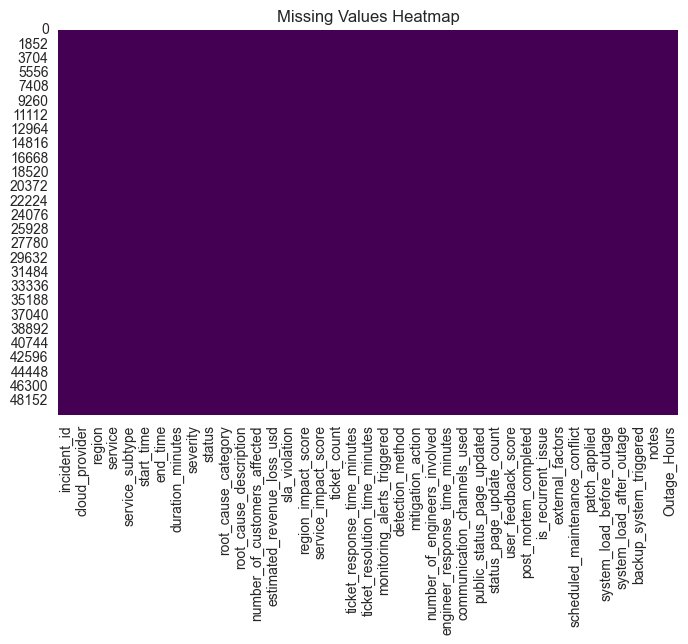

In [35]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

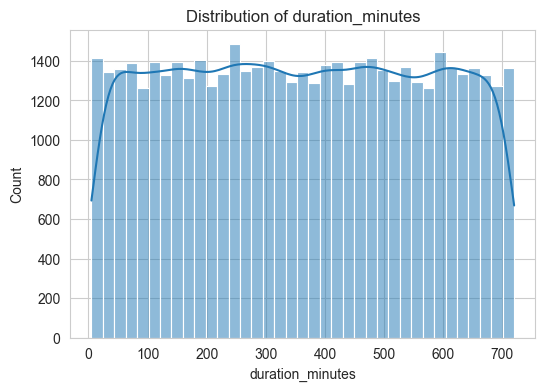

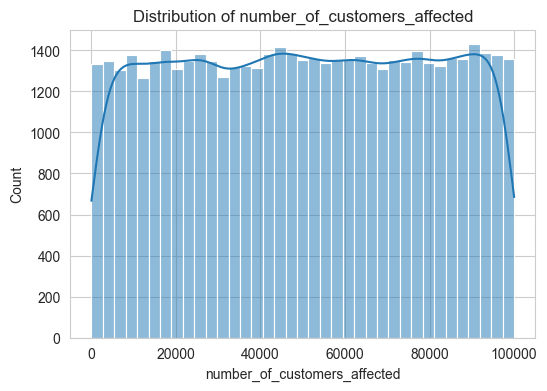

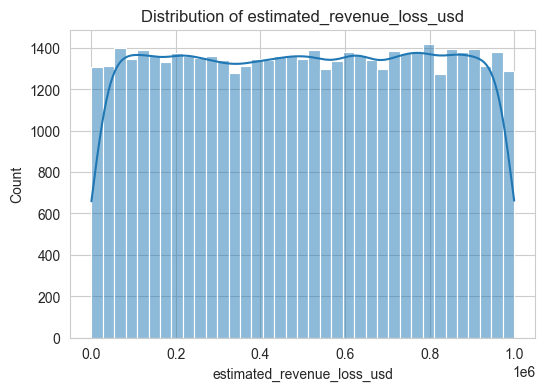

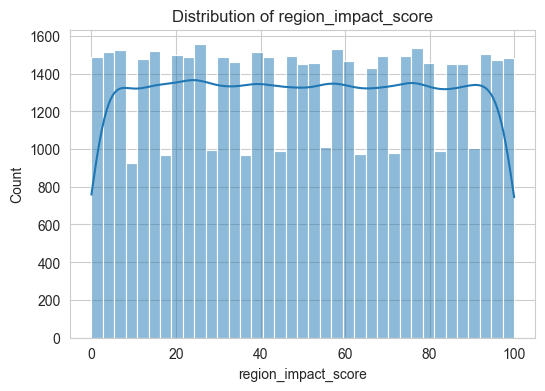

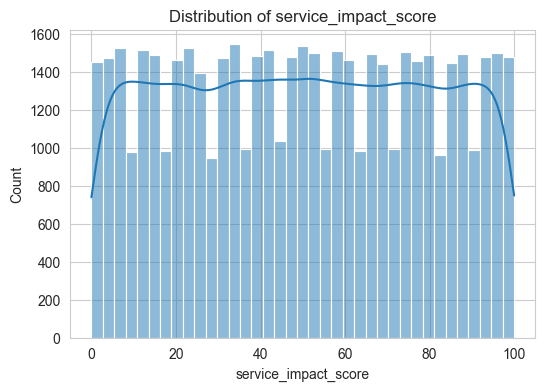

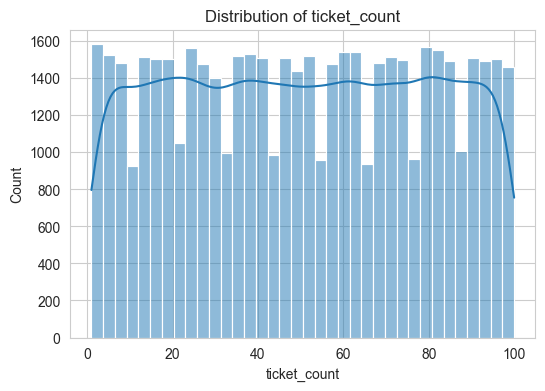

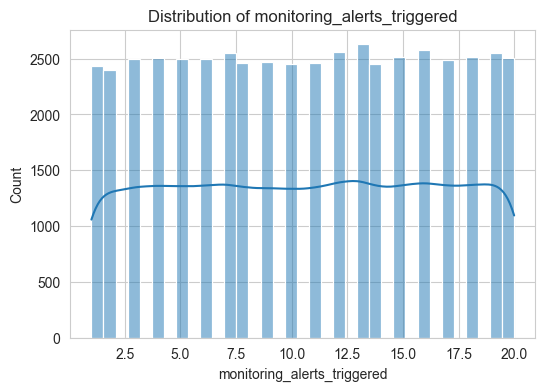

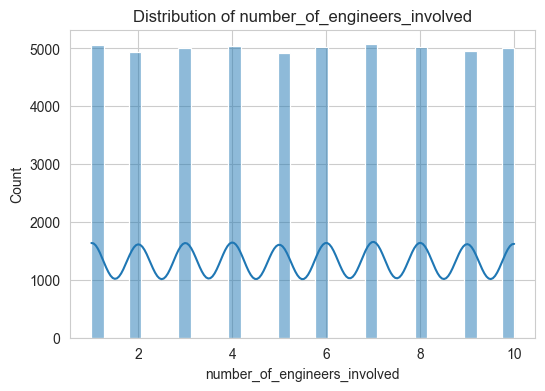

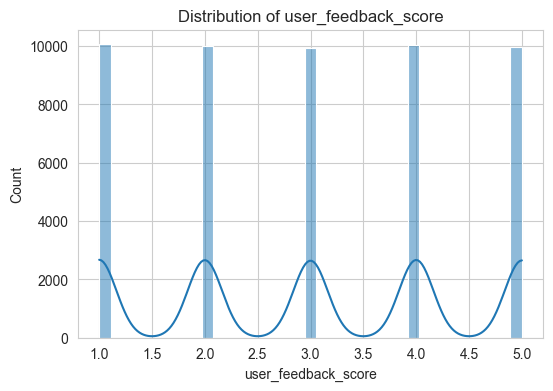

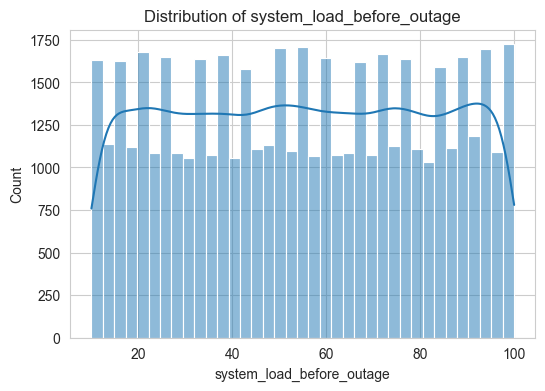

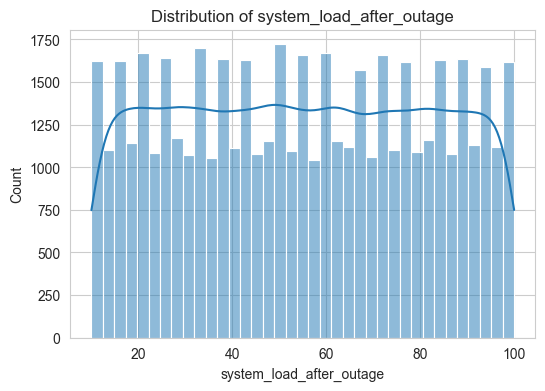

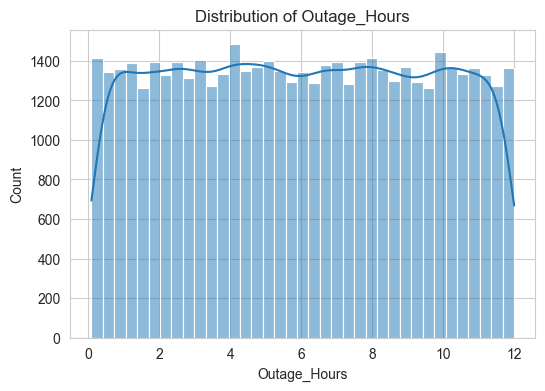

In [36]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

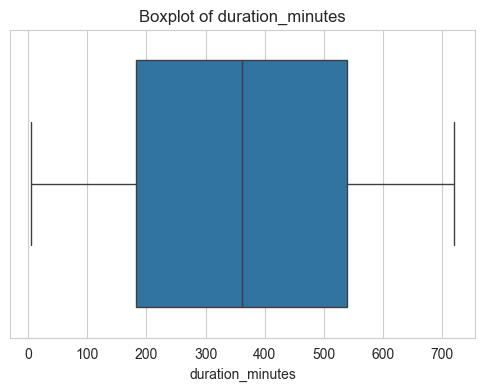

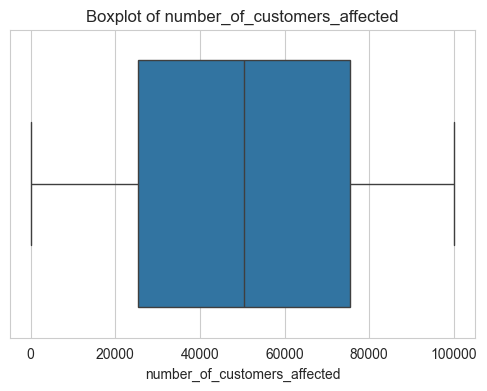

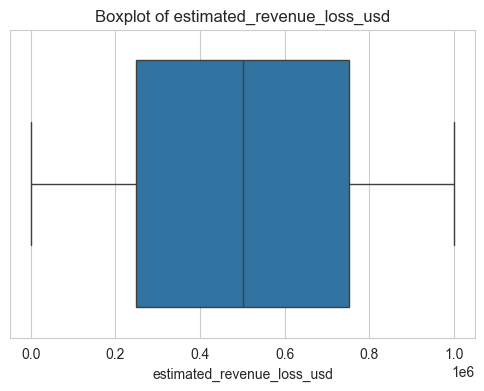

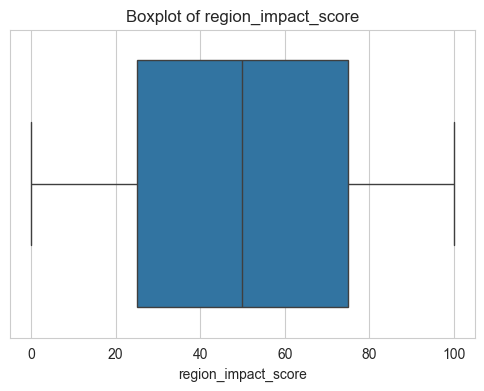

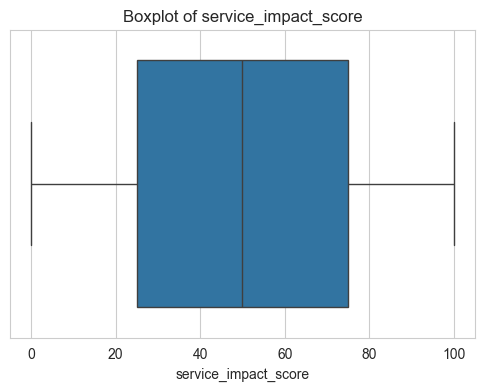

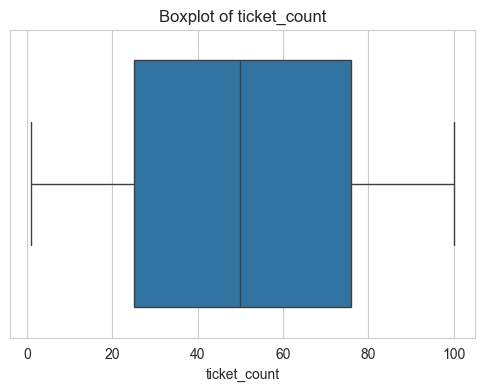

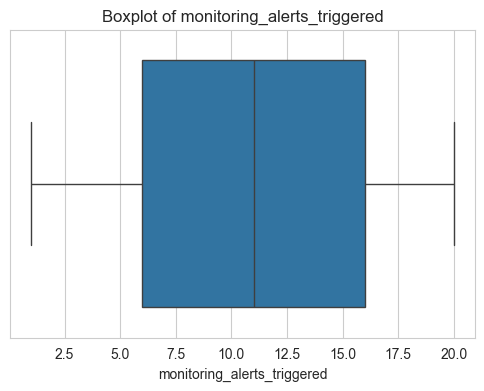

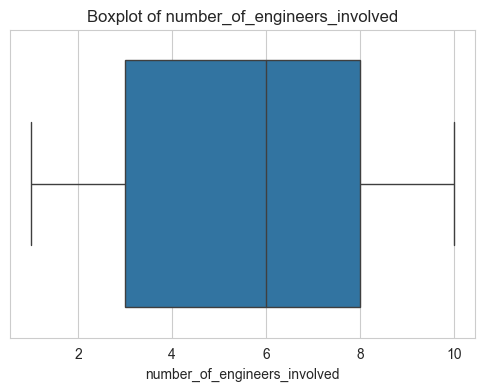

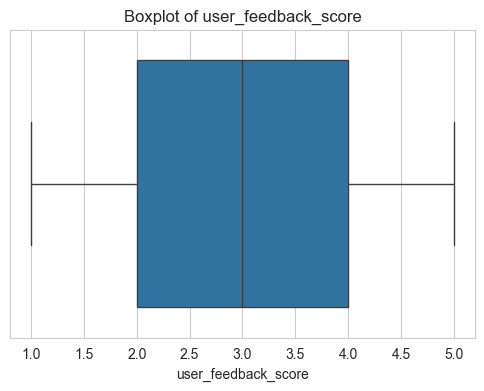

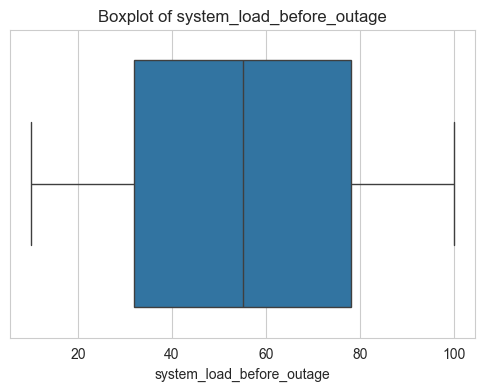

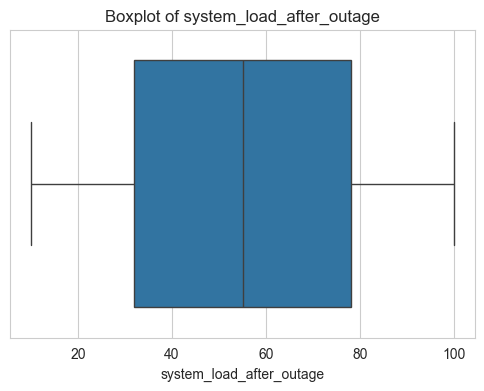

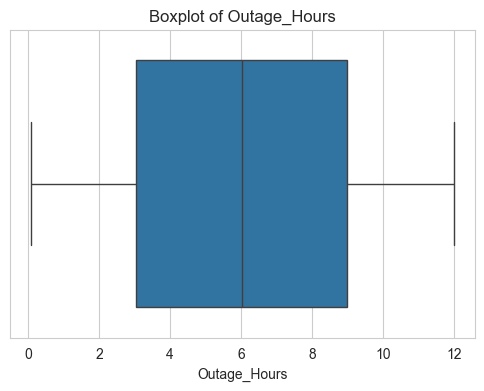

In [37]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## VISUALIZATION

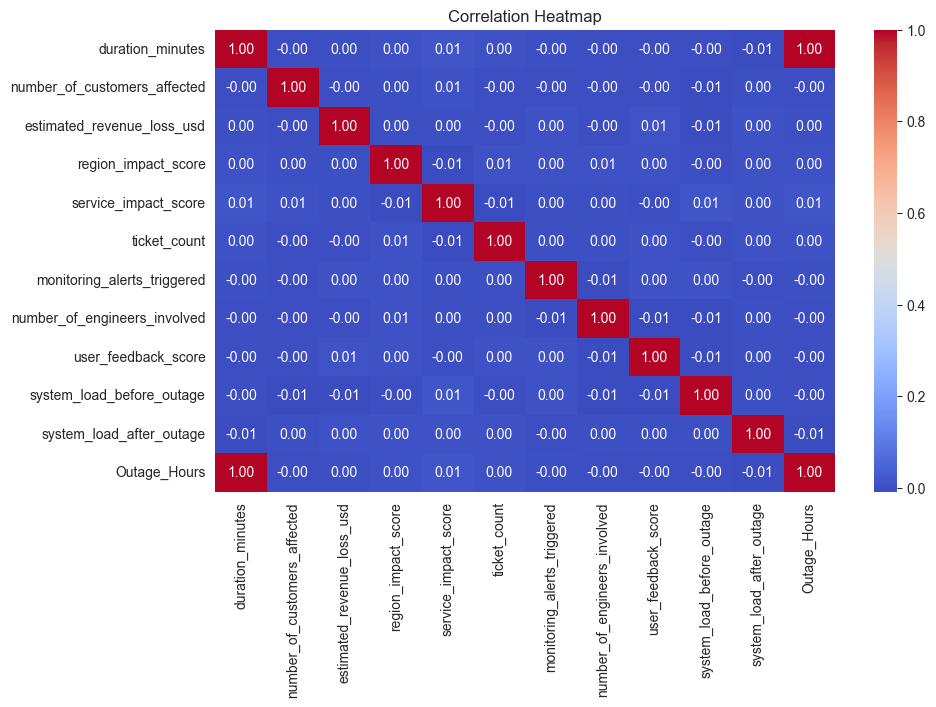

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap="coolwarm",
            fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

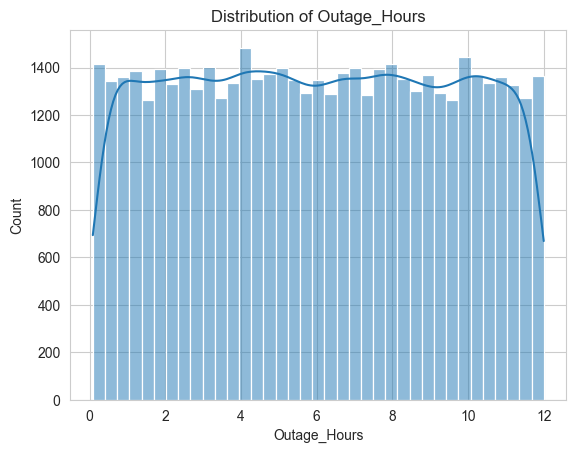

In [39]:
target_column = df.columns[-1]

plt.figure()
sns.histplot(df[target_column], kde=True)
plt.title(f"Distribution of {target_column}")
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

sns.pairplot(numeric_df)
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    if col != target_column:
        plt.figure()
        sns.scatterplot(x=df[col], y=df[target_column])
        plt.title(f"{col} vs {target_column}")
        plt.show()

## SKEWNESS

Skewness Values:
 duration_minutes                  0.005757
number_of_customers_affected     -0.008482
estimated_revenue_loss_usd       -0.005027
region_impact_score               0.004674
service_impact_score              0.002167
ticket_count                     -0.001968
ticket_response_time_minutes     -0.002082
ticket_resolution_time_minutes    0.006571
monitoring_alerts_triggered      -0.010084
number_of_engineers_involved     -0.001915
engineer_response_time_minutes   -0.001052
status_page_update_count         -0.001579
user_feedback_score               0.001617
post_mortem_link                       NaN
previous_incident_id                   NaN
system_load_before_outage        -0.003128
system_load_after_outage          0.006612
dtype: float64


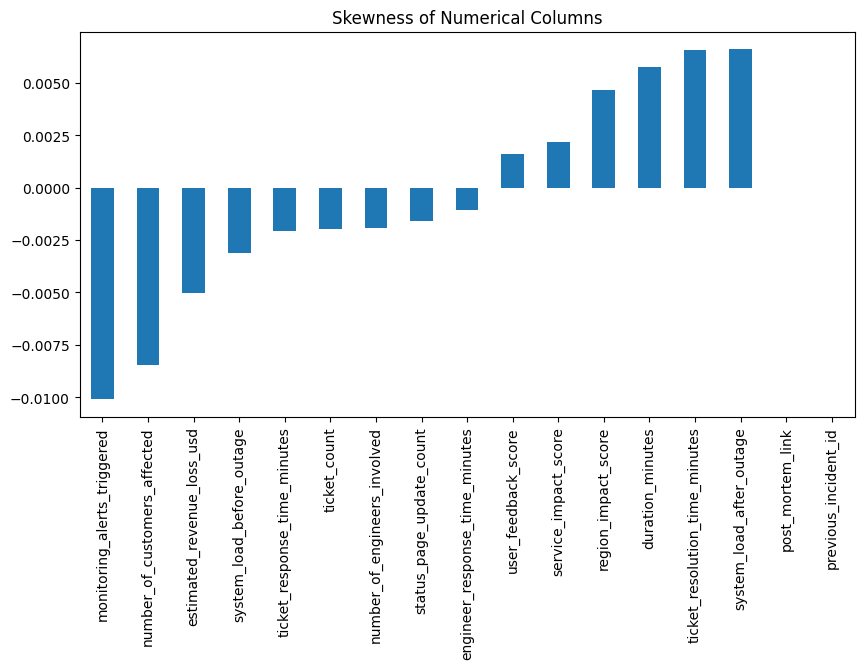

Transformation completed.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Cloud_outages_dataset.csv")
df.columns = df.columns.str.strip()

numeric_df = df.select_dtypes(include=np.number)

skewness_values = numeric_df.skew()

print("Skewness Values:\n", skewness_values)

plt.figure(figsize=(10,5))
skewness_values.sort_values().plot(kind='bar')
plt.title("Skewness of Numerical Columns")
plt.show()

# Fix highly skewed columns
skewed_cols = skewness_values[abs(skewness_values) > 1].index

for col in skewed_cols:
    df[col] = np.log1p(df[col])

print("Transformation completed.")

## LINEAR REGRESSION

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# 1. Load data efficiently
df = pd.read_csv('cloud_outages_dataset.csv')

# 2. Memory Optimization: Drop useless/empty/high-cardinality columns immediately
# These columns don't help prediction and consume massive RAM during encoding
cols_to_drop = [
    'incident_id', 'start_time', 'end_time', 'root_cause_description', 
    'notes', 'post_mortem_link', 'previous_incident_id'
]
df = df.drop(columns=cols_to_drop)

# 3. Handle Missing Values
# Only 'external_factors' has nulls based on the dataset scan
df['external_factors'] = df['external_factors'].fillna('None')

# 4. Define Targets
# Linear Regression Target: Estimated Revenue Loss (Continuous)
# Logistic Regression Target: SLA Violation (Binary: Yes/No)
target_lin = 'estimated_revenue_loss_usd'
target_log = 'sla_violation'

# 5. Preprocessing & Encoding
# Convert target to 0/1 for Logistic Regression
df[target_log] = df[target_log].map({'Yes': 1, 'No': 0})

# Separate features (X) and targets (y)
X = df.drop(columns=[target_lin, target_log])
y_lin = df[target_lin]
y_log = df[target_log]

# One-Hot Encoding categorical features
X = pd.get_dummies(X, drop_first=True)

# 6. Split and Scale Data
X_train, X_test, y_train_lin, y_test_lin = train_test_split(X, y_lin, test_size=0.2, random_state=42)
_, _, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- LINEAR REGRESSION ---
print("--- Linear Regression Results ---")
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train_lin)
y_pred_lin = lin_model.predict(X_test_scaled)

print(f"R2 Score: {r2_score(y_test_lin, y_pred_lin):.4f}")
print(f"MSE: {mean_squared_error(y_test_lin, y_pred_lin):.2f}")

# --- LOGISTIC REGRESSION ---
print("\n--- Logistic Regression Results ---")
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train_log)
y_pred_log = log_model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test_log, y_pred_log):.4f}")
print("Classification Report:\n", classification_report(y_test_log, y_pred_log))

--- Linear Regression Results ---
R2 Score: -0.0013
MSE: 84178470746.64

--- Logistic Regression Results ---
Accuracy: 0.4997
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.45      5039
           1       0.50      0.60      0.54      4961

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.49     10000



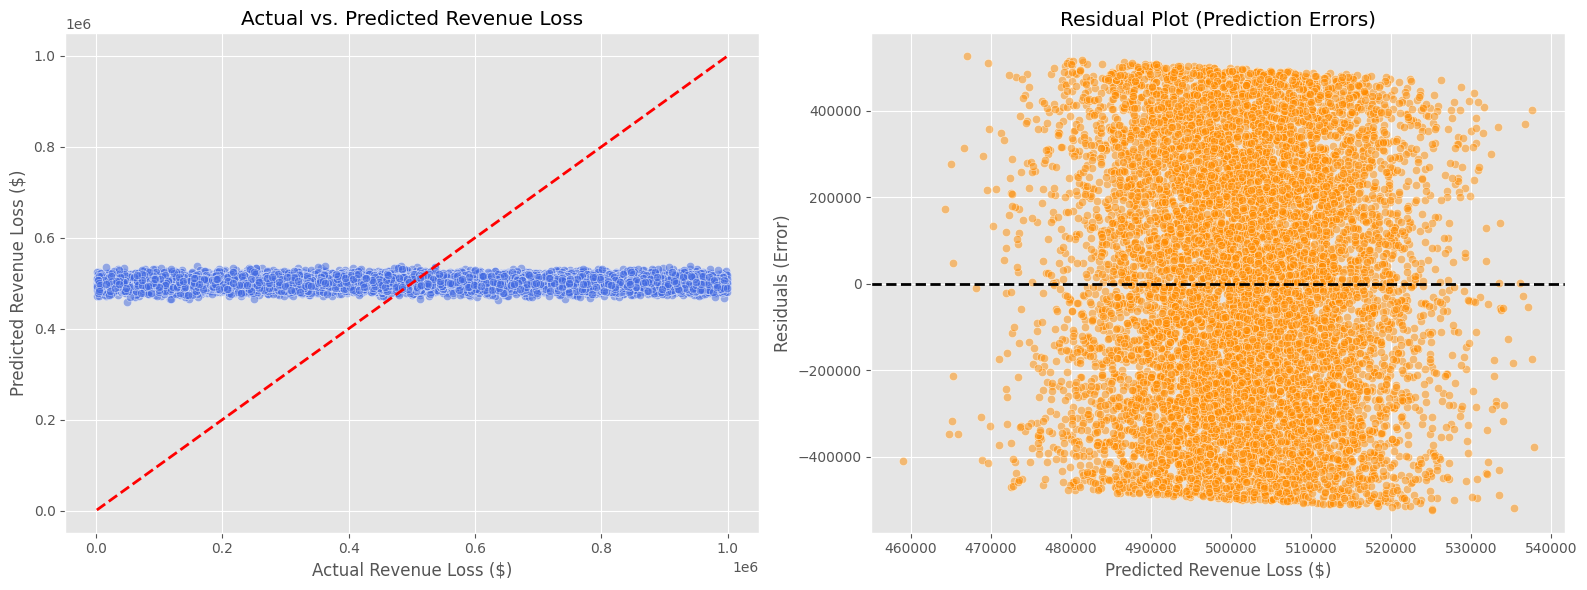

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
df = pd.read_csv('cloud_outages_dataset.csv')

# 2. Preprocessing: Drop high-cardinality/empty columns to save memory
cols_to_drop = [
    'incident_id', 'start_time', 'end_time', 'root_cause_description', 
    'notes', 'post_mortem_link', 'previous_incident_id'
]
df_clean = df.drop(columns=cols_to_drop)
df_clean['external_factors'] = df_clean['external_factors'].fillna('None')

# 3. Define Features and Target (Revenue Loss)
y = df_clean['estimated_revenue_loss_usd']
X = df_clean.drop(columns=['estimated_revenue_loss_usd', 'sla_violation'])

# 4. Encoding and Scaling
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 6. Generate Visualization
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Actual vs. Predicted
# Perfect predictions would fall on the diagonal red line
ax1.scatter(y_test, y_pred, alpha=0.5, color='royalblue', edgecolors='white')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
ax1.set_xlabel('Actual Revenue Loss ($)')
ax1.set_ylabel('Predicted Revenue Loss ($)')
ax1.set_title('Actual vs. Predicted Revenue Loss')

# Plot 2: Residual Plot (Error Analysis)
# Residual = Actual - Predicted
residuals = y_test - y_pred
ax2.scatter(y_pred, residuals, alpha=0.5, color='darkorange', edgecolors='white')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted Revenue Loss ($)')
ax2.set_ylabel('Residuals (Error)')
ax2.set_title('Residual Plot (Prediction Errors)')

plt.tight_layout()
plt.show()

## DESICION TREE

--- Decision Tree Classifier Performance ---
Accuracy: 0.5001
              precision    recall  f1-score   support

           0       0.50      0.42      0.46      5039
           1       0.50      0.58      0.54      4961

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000


--- Decision Tree Regressor Performance ---
R2 Score: -0.0005


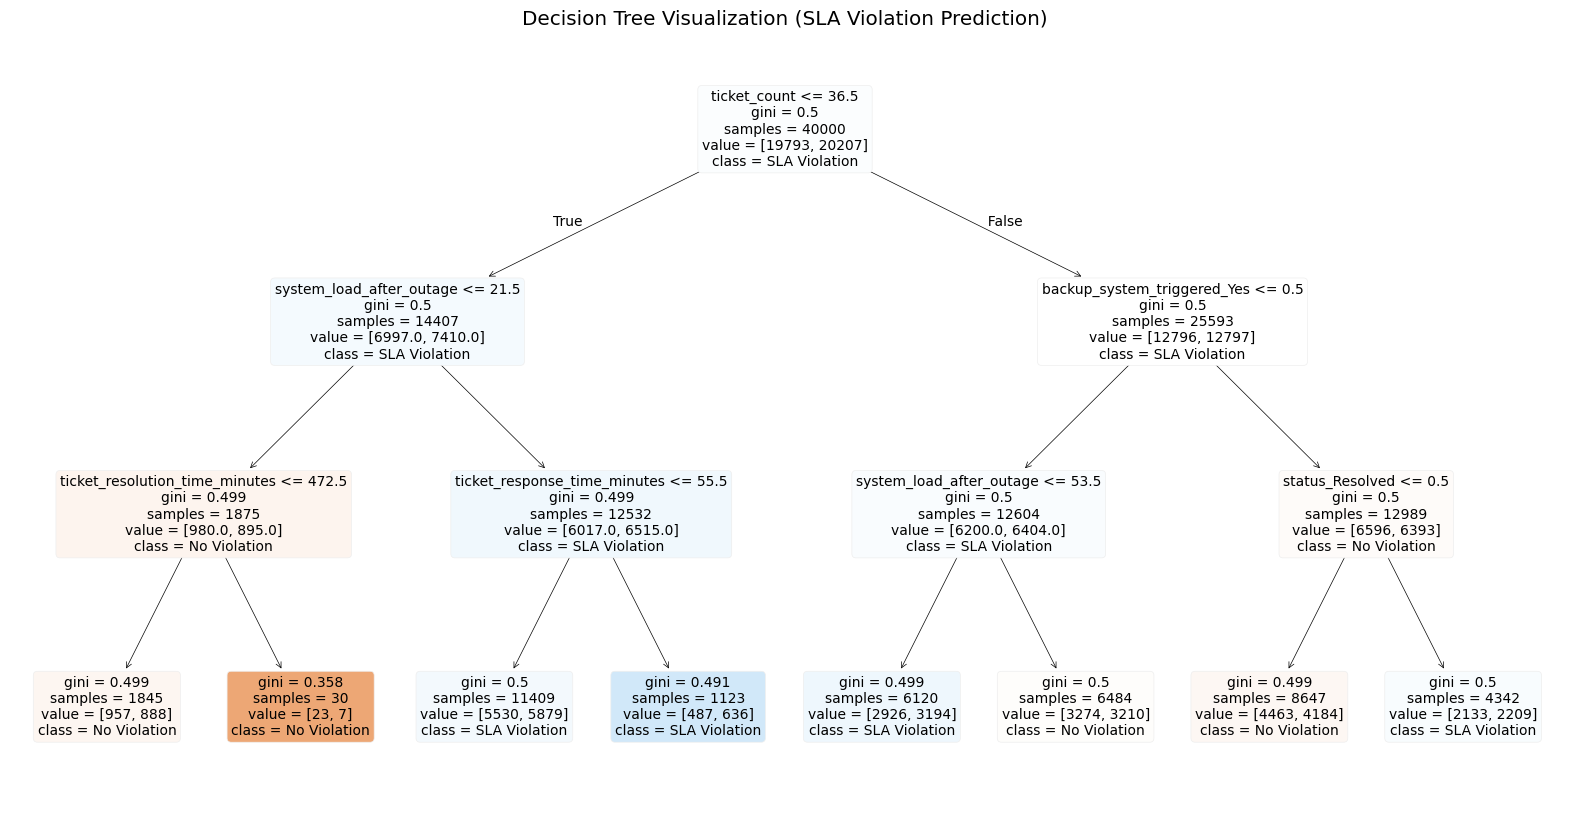

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, r2_score

# 1. Load and Preprocess Data
df = pd.read_csv('cloud_outages_dataset.csv')

# Drop non-predictive columns to prevent MemoryError and noise
cols_to_drop = [
    'incident_id', 'start_time', 'end_time', 'root_cause_description',
    'notes', 'post_mortem_link', 'previous_incident_id'
]
df_clean = df.drop(columns=cols_to_drop)

# Fill missing categorical values
df_clean['external_factors'] = df_clean['external_factors'].fillna('None')

# 2. Prepare Features and Targets
# Target 1: SLA Violation (Classification)
# Target 2: Revenue Loss (Regression)
y_clf = df_clean['sla_violation'].map({'Yes': 1, 'No': 0})
y_reg = df_clean['estimated_revenue_loss_usd']

# Features (Everything except the targets)
X = df_clean.drop(columns=['sla_violation', 'estimated_revenue_loss_usd'])
X = pd.get_dummies(X, drop_first=True)

# 3. Split Data
X_train, X_test, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# --- DECISION TREE CLASSIFIER (Predicting SLA Violation) ---
clf_model = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_model.fit(X_train, y_train_clf)
y_pred_clf = clf_model.predict(X_test)

print("--- Decision Tree Classifier Performance ---")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.4f}")
print(classification_report(y_test_clf, y_pred_clf))

# --- DECISION TREE REGRESSOR (Predicting Revenue Loss) ---
reg_model = DecisionTreeRegressor(max_depth=3, random_state=42)
reg_model.fit(X_train, y_train_reg)
y_pred_reg = reg_model.predict(X_test)

print("\n--- Decision Tree Regressor Performance ---")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg):.4f}")

# --- 4. VISUALIZING THE DECISION TREE ---
plt.figure(figsize=(20,10))
plot_tree(clf_model, 
          feature_names=X.columns.tolist(), 
          class_names=['No Violation', 'SLA Violation'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Visualization (SLA Violation Prediction)")
plt.savefig('decision_tree.png')
plt.show()